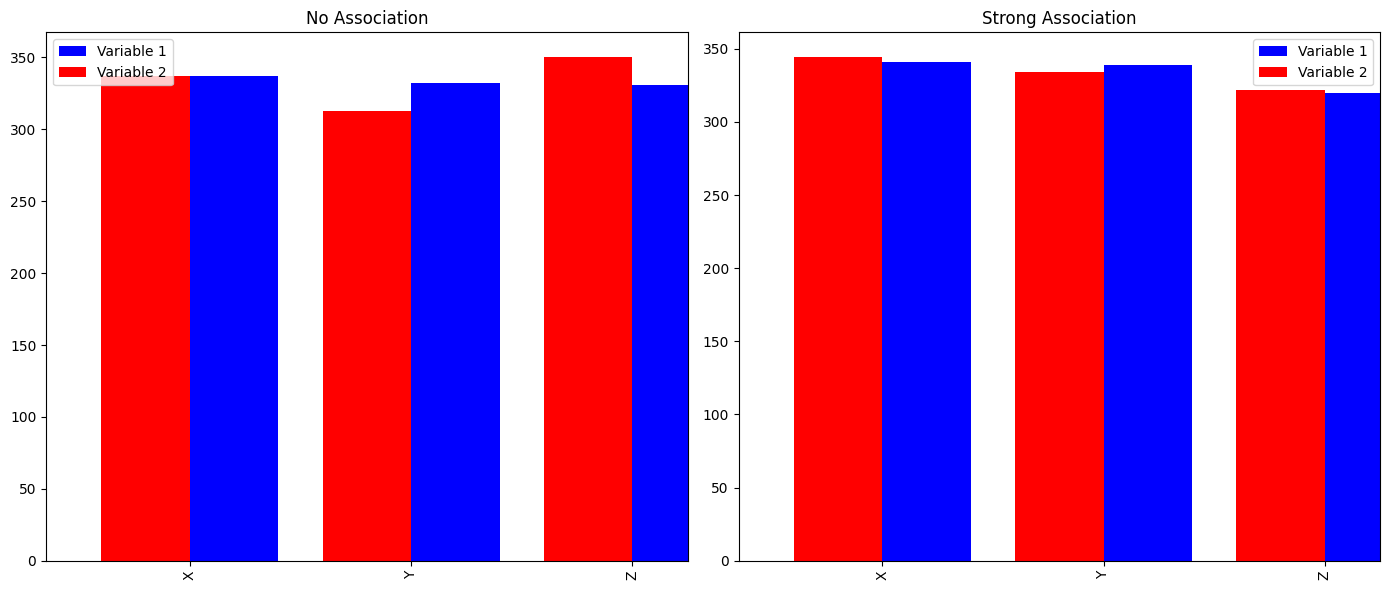

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Number of samples for each dataset
N = 1000

# 1. Datasets for Chi-squared test and Cramer's V
# 1.1 No association
cat1_no_assoc = np.random.choice(['A', 'B', 'C'], size=N)
cat2_no_assoc = np.random.choice(['X', 'Y', 'Z'], size=N)

# 1.2 Strong association (when cat1 is 'A', cat2 is most likely 'X', etc.)
mapping = {'A': 'X', 'B': 'Y', 'C': 'Z'}
cat1_strong_assoc = np.random.choice(['A', 'B', 'C'], size=N)
cat2_strong_assoc = [mapping[val] if np.random.rand() < 0.8 else np.random.choice(['X', 'Y', 'Z']) for val in cat1_strong_assoc]

# 2. Datasets for PSI
# 2.1 Similar distributions
scores_reference_similar = np.random.normal(600, 50, N)
scores_production_similar = np.random.normal(605, 50, N)

# 2.2 Different distributions
scores_reference_diff = np.random.normal(600, 50, N)
scores_production_diff = np.random.normal(650, 50, N)

datasets = {
    'Chi-squared & Cramer\'s V': {
        'No Association': (cat1_no_assoc, cat2_no_assoc),
        'Strong Association': (cat1_strong_assoc, cat2_strong_assoc)
    },
    'PSI': {
        'Similar Distributions': (scores_reference_similar, scores_production_similar),
        'Different Distributions': (scores_reference_diff, scores_production_diff)
    }
}

# Visualizing the first set of datasets (for categorical variables)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
pd.Series(cat1_no_assoc).value_counts().sort_index().plot(kind='bar', ax=axes[0], position=0, width=0.4, color='blue', label='Variable 1')
pd.Series(cat2_no_assoc).value_counts().sort_index().plot(kind='bar', ax=axes[0], position=1, width=0.4, color='red', label='Variable 2')
axes[0].set_title('No Association')
axes[0].legend()

pd.Series(cat1_strong_assoc).value_counts().sort_index().plot(kind='bar', ax=axes[1], position=0, width=0.4, color='blue', label='Variable 1')
pd.Series(cat2_strong_assoc).value_counts().sort_index().plot(kind='bar', ax=axes[1], position=1, width=0.4, color='red', label='Variable 2')
axes[1].set_title('Strong Association')
axes[1].legend()

plt.tight_layout()
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Number of samples
N = 1000

# 1. Two identical normal distributions
mean1, std1 = 0, 1
data1_a = np.random.normal(mean1, std1, N)
data1_b = np.random.normal(mean1, std1, N)

# 2. Two slightly different normal distributions
mean2_a, mean2_b, std2 = 0, 0.5, 1
data2_a = np.random.normal(mean2_a, std2, N)
data2_b = np.random.normal(mean2_b, std2, N)

# 3. Two very different normal distributions
mean3_a, mean3_b, std3 = 0, 5, 1
data3_a = np.random.normal(mean3_a, std3, N)
data3_b = np.random.normal(mean3_b, std3, N)

# 4. A normal and a uniform distribution
mean4, std4 = 0, 1
data4_a = np.random.normal(mean4, std4, N)
data4_b = np.random.uniform(-3, 3, N)  # Chose these bounds to make it interesting


In [3]:
from pureml_evaluate.drift_evaluator.univariate import Univariate

In [4]:
uu = Univariate()
uu.reference = data1_a
uu.production = data1_b
uu.kwargs = {'drift_types' : 'feature_drift','dataset_types' : 'continuous'}


In [5]:
uu.compute()

{'kolmogorov_smirnov': {'value': {'ks_stat': 0.045,
   'p_value': 0.26347172719864703}},
 'wasserstein_distance': {'value': 0.014660278706218702},
 'hellinger_distance': {'value': 0.14371687035258263},
 'l_infinity_distance': {'value': 4.28120393757531}}

In [6]:
uu = Univariate()
uu.reference = scores_reference_similar
uu.production = scores_reference_diff
uu.kwargs = {'drift_types' : 'feature_drift','dataset_types' : 'discrete'}
uu.compute()


{'chi_squared_statistic': {'value': 3921.5866044203453},
 'cramers_v': {'value': {0: 1.0000000000000009}},
 'population_stability_index': {'value': 0.017051124738511034}}

In [7]:
from pureml_evaluate.drift_evaluator.evaluator import eval 

In [14]:
result = eval(reference = data1_a,production = data1_b,
              datasettype = 'continuous',drift_evaluator= 'feature_drift',variate_evaluator = 'univariate')
result

{'feature_drift': {'kolmogorov_smirnov': {'value': {'ks_stat': 0.045,
    'p_value': 0.26347172719864703}},
  'wasserstein_distance': {'value': 0.014660278706218702},
  'hellinger_distance': {'value': 0.14371687035258263},
  'l_infinity_distance': {'value': 4.28120393757531}}}

In [9]:
from pureml_evaluate.drift_evaluator.grade import Grader

In [10]:
variate_type = 'univariate'
kwargs = {'drift_types' : 'feature_drift','dataset_types' : 'continuous'}
reference = data1_a
production = data1_b

In [11]:
gra = Grader(dataset_types='continuous', drift_types='feature_drift', variate_types='univariate')

reference = data1_a
production = data1_b
gra.compute(reference=reference,production=production)

{'kolmogorov_smirnov': {'value': {'ks_stat': 0.045,
   'p_value': 0.26347172719864703}},
 'wasserstein_distance': {'value': 0.014660278706218702},
 'hellinger_distance': {'value': 0.14371687035258263},
 'l_infinity_distance': {'value': 4.28120393757531}}

In [12]:
result

{'feature_drift': {'kolmogorov_smirnov': {'value': {'ks_stat': 0.045,
    'p_value': 0.26347172719864703}},
  'wasserstein_distance': {'value': 0.014660278706218702},
  'hellinger_distance': {'value': 0.14371687035258263},
  'l_infinity_distance': {'value': 4.28120393757531}}}

In [13]:
result = eval(reference = scores_reference_similar,
              production = scores_reference_diff,datasettype = 'discrete',
              drift_evaluator= 'feature_drift',
              variate_evaluator = 'univariate')
result

{'feature_drift': {'chi_squared_statistic': {'value': 3921.5866044203453},
  'cramers_v': {'value': {0: 1.0000000000000009}},
  'population_stability_index': {'value': 0.017051124738511034}}}